In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
dataset = pd.read_csv("movies.csv",encoding = "ISO-8859-1")
dataset.describe()
#dataset.info()
#dataset

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


# Remove all rows with budget =0 

In [70]:
dataset = dataset.drop(dataset[dataset.budget == 0].index)
dataset

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,3000000.0,Westerly Films,Ireland,Whit Stillman,Comedy,14013564.0,Love & Friendship,PG,2016-06-03,90,6.5,Kate Beckinsale,17862,Whit Stillman,2016
6809,3800000.0,Sycamore Pictures,USA,John Krasinski,Comedy,1016872.0,The Hollars,PG-13,2016-08-26,88,6.5,Sharlto Copley,7227,Jim Strouse,2016
6811,8500000.0,CBS Films,USA,Steve Carr,Animation,19985196.0,Middle School: The Worst Years of My Life,PG,2016-10-07,92,6.1,Griffin Gluck,4556,Chris Bowman,2016
6814,20000000.0,LD Entertainment,USA,Kevin Reynolds,Action,36874745.0,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,2016


To extract month from the released date

In [71]:
dataset['month'] = pd.DatetimeIndex(dataset['released']).month

In [72]:
dataset.country.unique()

array(['USA', 'UK', 'Australia', 'France', 'Canada', 'Italy', 'Ireland',
       'Sweden', 'Spain', 'Japan', 'South Africa', 'Germany',
       'New Zealand', 'Mexico', 'Hong Kong', 'Taiwan', 'Austria',
       'Portugal', 'Peru', 'Republic of Macedonia', 'Russia', 'Iran',
       'Denmark', 'Netherlands', 'Jamaica', 'Aruba', 'Brazil',
       'Czech Republic', 'South Korea', 'Argentina', 'India', 'China',
       'Hungary', 'Romania', 'Colombia', 'Israel', 'Belgium', 'Norway',
       'Indonesia', 'Switzerland', 'Kenya', 'Chile', 'Malta', 'Finland',
       'Panama'], dtype=object)

In [73]:
'''
Replacing countries with continent encoding
Africa = 0
Asia = 1
North America = 2
South America = 3
Europe = 4
Australia = 5
'''
dict = {"USA": 2, "UK": 4, "Australia": 5, "France": 4, "Canada": 2, "Italy": 4,
       "Ireland": 4,"Sweden": 4,"Spain": 4,"Japan": 1, "South Africa": 0,"Germany": 4,
       "New Zealand": 5,"Mexico": 2,"Hong Kong": 1,"Taiwan": 1, "Austria": 4,"Portugal": 4,
       "Peru": 3,"Republic of Macedonia": 4,"Russia": 1,"Iran": 1,"Denmark": 4,"Netherlands": 4,
       "Jamaica": 2,"Aruba": 2,"Brazil": 3,"Czech Republic": 4,"South Korea":1,"Argentina": 3,
       "India": 1,"China": 1,"Hungary": 4,"Romania": 4,"Colombia": 3,"Israel": 1,"Belgium": 4,
       "Norway": 4,"Indonesia": 1,"Switzerland": 4,"Kenya": 0, "Chile": 3,"Malta": 4,"Finland": 4,
       "Panama": 2}
dataset = dataset.replace({"country": dict})
dataset.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,month
0,8000000.0,Columbia Pictures Corporation,2,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,8
1,6000000.0,Paramount Pictures,2,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,6
2,15000000.0,Paramount Pictures,2,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,5
3,18500000.0,Twentieth Century Fox Film Corporation,2,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,7
4,9000000.0,Walt Disney Pictures,2,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,8


In [74]:
dataset.rating.unique()

array(['R', 'PG-13', 'PG', 'UNRATED', 'G', 'NC-17', 'NOT RATED',
       'Not specified'], dtype=object)

In [75]:
'''
Replacing ratings with numerical categories
G = 0
PG/PG-13 = 1
NC-17 = 2
R = 3
Others = 4
'''
dict = {"G": 0, "PG": 1, "PG-13": 1, "NC-17": 2, "R": 3, "UNRATED": 4,
       "NOT RATED": 4,"Not specified": 4}

dataset = dataset.replace({"rating": dict})
dataset.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,month
0,8000000.0,Columbia Pictures Corporation,2,Rob Reiner,Adventure,52287414.0,Stand by Me,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,8
1,6000000.0,Paramount Pictures,2,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,1,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,6
2,15000000.0,Paramount Pictures,2,Tony Scott,Action,179800601.0,Top Gun,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,5
3,18500000.0,Twentieth Century Fox Film Corporation,2,James Cameron,Action,85160248.0,Aliens,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,7
4,9000000.0,Walt Disney Pictures,2,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,8


In [76]:
dataset.genre.unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Thriller',
       'Horror', 'Biography', 'Animation', 'Sci-Fi', 'Fantasy', 'Family',
       'Mystery', 'Western', 'Musical', 'Romance'], dtype=object)

In [77]:
'''
Replacing genres with numerical categories
Adventure = 0
Comedy = 1
Action = 2
Drama = 3
Crime = 4
Thriller = 5
Horror = 6
Biography = 7
Animation = 8
Sci-fi = 9
Fantasy = 10
Family = 11
Mystery = 12
Western = 13
Musical = 14
Romance = 15
'''
dict = {"Adventure": 0, "Comedy": 1, "Action": 2, "Drama": 3, "Crime": 4, "Thriller": 5,
       "Horror": 6,"Biography": 7,"Animation": 8,"Sci-Fi": 9,"Fantasy": 10,"Family": 11,
       "Mystery": 12,"Western": 13,"Musical": 14,"Romance":15 }

dataset = dataset.replace({"genre": dict})
dataset.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,month
0,8000000.0,Columbia Pictures Corporation,2,Rob Reiner,0,52287414.0,Stand by Me,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,8
1,6000000.0,Paramount Pictures,2,John Hughes,1,70136369.0,Ferris Bueller's Day Off,1,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,6
2,15000000.0,Paramount Pictures,2,Tony Scott,2,179800601.0,Top Gun,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,5
3,18500000.0,Twentieth Century Fox Film Corporation,2,James Cameron,2,85160248.0,Aliens,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,7
4,9000000.0,Walt Disney Pictures,2,Randal Kleiser,0,18564613.0,Flight of the Navigator,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,8


In [78]:
dataset.year.unique()

array([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [79]:
'''
Replacing year with numerical categories
Before 1990(inclusive) = 0
1991 to 2000 = 1
2001 to 2010 = 2
After 2011(inclusive) = 3
'''
dict = {1986: 0, 1987: 0, 1988: 0, 1989: 0, 1990: 0,
        1991: 1, 1992: 1, 1993: 1, 1994: 1, 1995: 1, 1996: 1, 1997: 1, 1998: 1, 1999: 1, 2000: 1,
        2001: 2, 2002: 2, 2003: 2, 2004: 2, 2005: 2, 2006: 2, 2007: 2, 2008: 2, 2009: 2, 2010: 2,
        2011: 3, 2012: 3, 2013: 3, 2014: 3, 2015: 3, 2016: 3}

dataset = dataset.replace({"year": dict})
dataset.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,month
0,8000000.0,Columbia Pictures Corporation,2,Rob Reiner,0,52287414.0,Stand by Me,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,0,8
1,6000000.0,Paramount Pictures,2,John Hughes,1,70136369.0,Ferris Bueller's Day Off,1,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,0,6
2,15000000.0,Paramount Pictures,2,Tony Scott,2,179800601.0,Top Gun,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,0,5
3,18500000.0,Twentieth Century Fox Film Corporation,2,James Cameron,2,85160248.0,Aliens,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,0,7
4,9000000.0,Walt Disney Pictures,2,Randal Kleiser,0,18564613.0,Flight of the Navigator,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,0,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A9EE3AB908>,
      dtype=object)

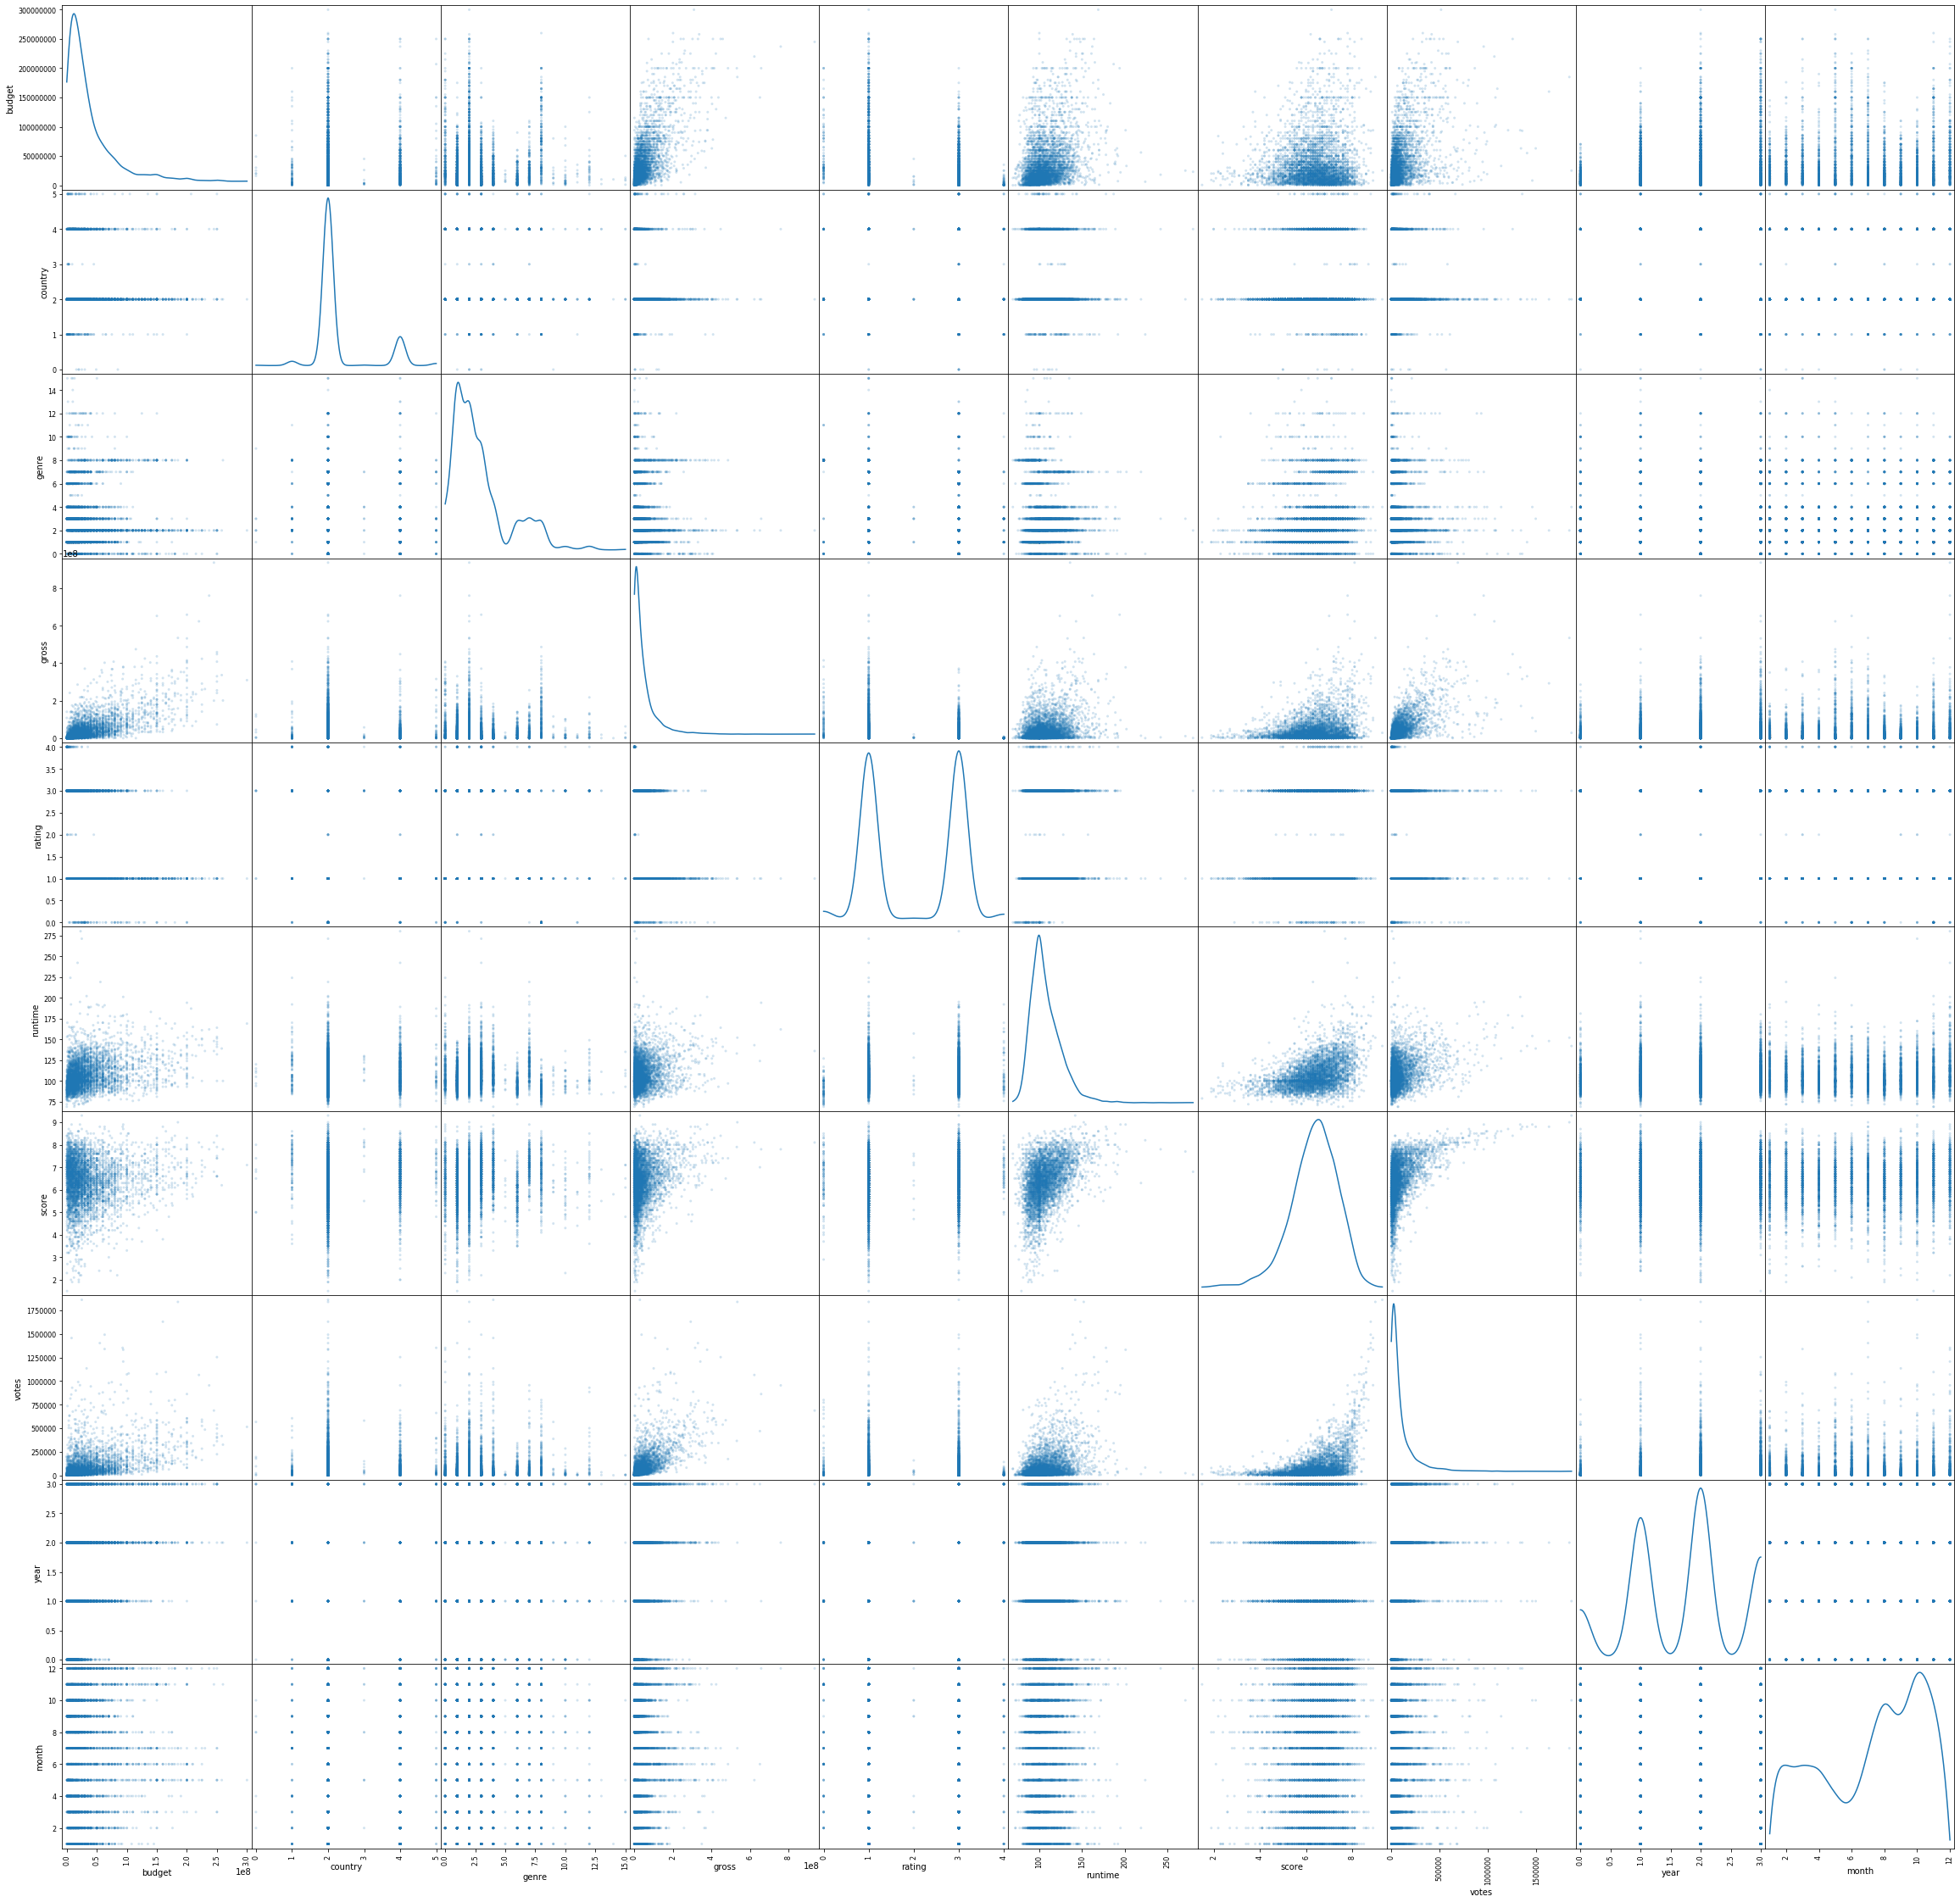

In [80]:
x = dataset.drop(["company","director","name","released","star","writer"],axis=1)
from pandas.plotting import scatter_matrix
scatter_matrix(x, alpha=0.2, figsize=(40, 40), diagonal='kde')

In [81]:
x = dataset.drop(["company","director","name","released","star","writer"],axis=1)
x_test = x[["gross","budget"]]
x_test

,gross,budget
0,52287414.0,8000000.0
1,70136369.0,6000000.0
2,179800601.0,15000000.0
3,85160248.0,18500000.0
4,18564613.0,9000000.0
...,...,...
6808,14013564.0,3000000.0
6809,1016872.0,3800000.0
6811,19985196.0,8500000.0
6814,36874745.0,20000000.0


# K-Means Clustering

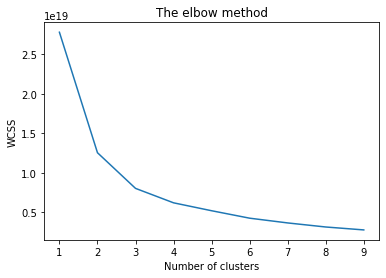

In [82]:
wcss = []

# Trying kmeans for k=1 to k=15
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_test)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [83]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_test)
x_test['cluster_number']=y_kmeans
x0 = x_test.loc[x_test.cluster_number == 0, 'gross']
y0 = x_test.loc[x_test.cluster_number == 0, 'budget']
x1 = x_test.loc[x_test.cluster_number == 1, 'gross']
y1 = x_test.loc[x_test.cluster_number == 1, 'budget']
x2 = x_test.loc[x_test.cluster_number == 2, 'gross']
y2 = x_test.loc[x_test.cluster_number == 2, 'budget']
x3 = x_test.loc[x_test.cluster_number == 3, 'gross']
y3 = x_test.loc[x_test.cluster_number == 3, 'budget']
#x4 = x_test.loc[x_test.cluster_number == 4, 'gross']
#y4 = x_test.loc[x_test.cluster_number == 4, 'budget']
#x5 = x_test.loc[x_test.cluster_number == 5, 'gross']
#y5 = x_test.loc[x_test.cluster_number == 5, 'budget']

D:\Anacoda3\envs\pythonEx\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


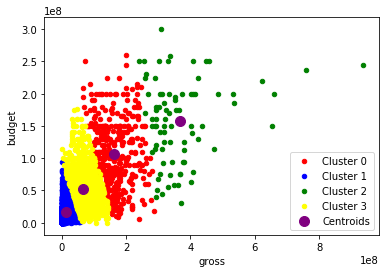

In [84]:
#Visualising the clusters
plt.scatter(x0, y0, s = 20, c = 'red', label = 'Cluster 0')
plt.scatter(x1, y1, s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x2, y2, s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(x3, y3, s = 20, c = 'yellow', label = 'Cluster 3')
#plt.scatter(x4, y4, s = 20, c = 'orange', label = 'Cluster 4')
#plt.scatter(x5, y5, s = 20, c = 'pink', label = 'Cluster 5')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'purple', label = 'Centroids')
plt.xlabel("gross")
plt.ylabel("budget")
plt.legend()

The blue cluster are the unsuccessful movie cluster. The yellow are the below average cluster. The red cluster are the average success movies. The green cluster are the successful movies

# DBSCAN for clustering

In [85]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_test)
x_scaled = x_scaled[:,:2]
x_scaled

array([[0.05582282, 0.0266472 ],
       [0.07487874, 0.0199804 ],
       [0.19195858, 0.049981  ],
       ...,
       [0.02133629, 0.0283139 ],
       [0.03936792, 0.066648  ],
       [0.00402994, 0.0116469 ]])

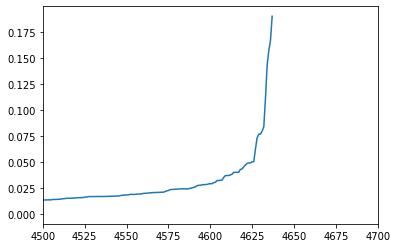

In [86]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_scaled)
distances, indices = nbrs.kneighbors(x_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlim(4500, 4700)
#plt.ylim(0, 0.1)
plt.plot(distances)
#optimal eps is the maximum curvature:0.125

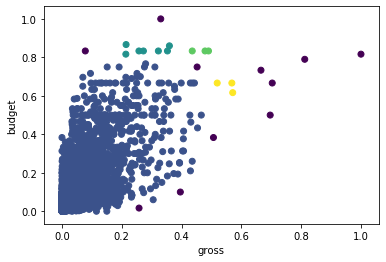

In [87]:
dbscan = DBSCAN(eps=0.060, min_samples = 3, metric='euclidean')
clusters = dbscan.fit_predict(x_scaled)

# plot the cluster assignments
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters,)
plt.xlabel("gross")
plt.ylabel("budget")

plt.show()

# Hierarchical Clustering

In [88]:
dataset.to_csv('movies_clean.csv',index=False,sep=',')
x = dataset.iloc[:,[0,5,7]].values
print(type(x))
print(x[0:5,:])

<class 'numpy.ndarray'>
[[8.00000000e+06 5.22874140e+07 3.00000000e+00]
 [6.00000000e+06 7.01363690e+07 1.00000000e+00]
 [1.50000000e+07 1.79800601e+08 1.00000000e+00]
 [1.85000000e+07 8.51602480e+07 3.00000000e+00]
 [9.00000000e+06 1.85646130e+07 1.00000000e+00]]


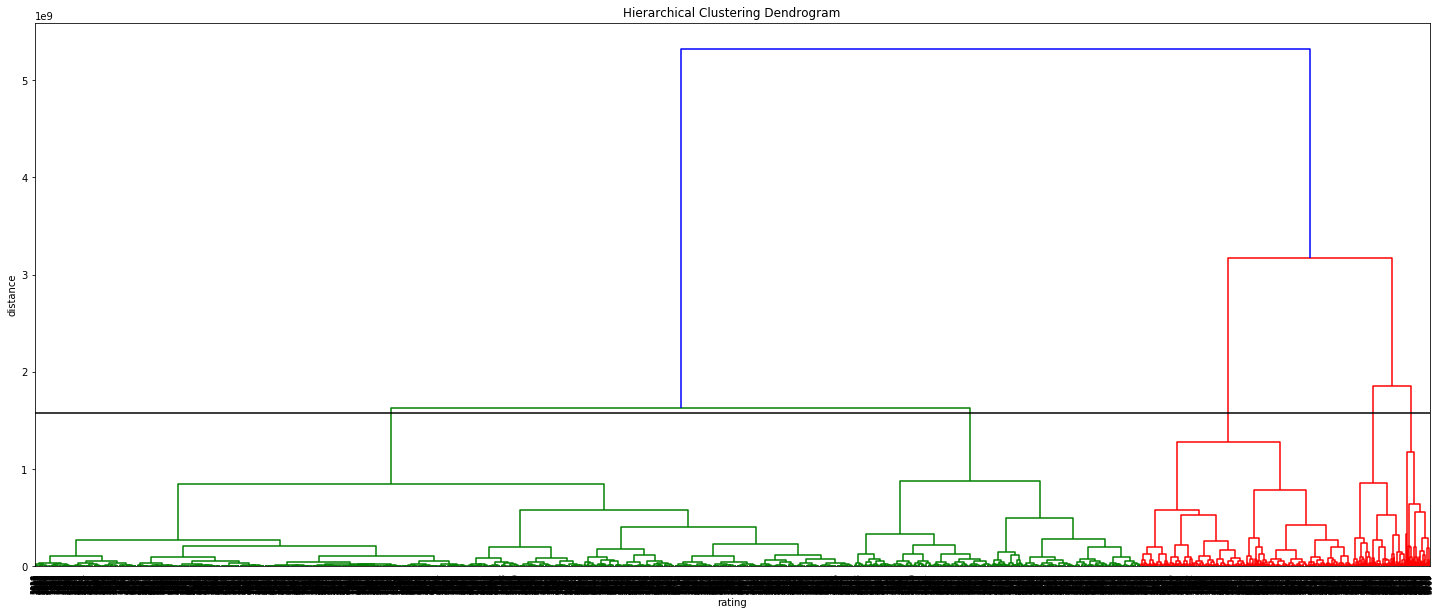

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(x, 'ward')
max_d=1580000000

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('rating')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=4638,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [90]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=5)
clustering.fit(x);

In [91]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
y = label_encoder.fit_transform(dataset['rating']) 

(4638, 3)


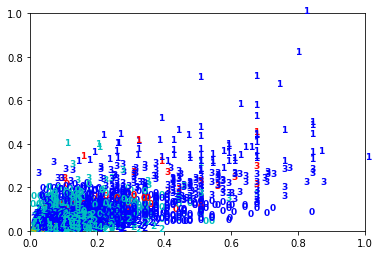

In [92]:
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(x)
print(X_plot.shape)
colours = 'rbgcy'
for i in range(x.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )
plt.show()

# Deciding on K-Means clusters as it makes more sense

In [93]:
y_kmeans

array([1, 3, 0, ..., 1, 1, 1])

In [94]:
#grouping movies into categories based on k-means clustering of k=4
#0 = Average (red)
#1= Not successful (blue)
#2 = Successful (green)
#3 = Below average (yellow)
dataset["Success"] = y_kmeans

In [105]:
df_final = dataset.drop(["company","director","name","released","star","writer"],axis=1)
df_final

,budget,country,genre,gross,rating,runtime,score,votes,year,month,Success
0,8000000.0,2,0,52287414.0,3,89,8.1,299174,0,8,1
1,6000000.0,2,1,70136369.0,1,103,7.8,264740,0,6,3
2,15000000.0,2,2,179800601.0,1,110,6.9,236909,0,5,0
3,18500000.0,2,2,85160248.0,3,137,8.4,540152,0,7,3
4,9000000.0,2,0,18564613.0,1,90,6.9,36636,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...
6808,3000000.0,4,1,14013564.0,1,90,6.5,17862,3,6,1
6809,3800000.0,2,1,1016872.0,1,88,6.5,7227,3,8,1
6811,8500000.0,2,8,19985196.0,1,92,6.1,4556,3,10,1
6814,20000000.0,2,2,36874745.0,1,107,6.3,19084,3,2,1


In [96]:
df_final.corr()
#checking if there are any correlation for the features

,budget,country,genre,gross,rating,runtime,score,votes,year,month,Success
budget,1.000000,-0.034538,0.009503,0.680033,-0.329720,0.313064,0.073579,0.451467,0.241915,0.072643,0.129156
country,-0.034538,1.000000,0.056496,-0.083052,0.050616,0.068719,0.094492,-0.011499,0.049461,-0.011314,-0.050334
genre,0.009503,0.056496,1.000000,0.022888,0.017334,-0.023958,0.138671,0.025187,0.068882,0.001714,-0.048139
gross,0.680033,-0.083052,0.022888,1.000000,-0.293311,0.253273,0.229552,0.642904,0.160077,0.066312,0.109081
rating,-0.329720,0.050616,0.017334,-0.293311,1.000000,0.076601,0.136554,-0.055941,-0.060872,-0.039677,-0.104555
runtime,0.313064,0.068719,-0.023958,0.253273,0.076601,1.000000,0.417031,0.359817,0.049921,0.075131,0.090098
score,0.073579,0.094492,0.138671,0.229552,0.136554,0.417031,1.000000,0.470648,0.061059,0.057271,0.018704
votes,0.451467,-0.011499,0.025187,0.642904,-0.055941,0.359817,0.470648,1.000000,0.178462,0.061891,0.085794
year,0.241915,0.049461,0.068882,0.160077,-0.060872,0.049921,0.061059,0.178462,1.000000,-0.020497,0.045333
month,0.072643,-0.011314,0.001714,0.066312,-0.039677,0.075131,0.057271,0.061891,-0.020497,1.000000,0.029288


# Performing KNN with KFold. Best accuracy = 77.9% with k=43

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

for i in range(1,55,+2):
    clf = KNeighborsClassifier(n_neighbors = i)
    scoring = 'accuracy'
    score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
    print(i)
    print(round(np.mean(score)*100, 2))

1
69.58
3
72.94
5
75.27
7
76.24
9
76.52
11
76.71
13
77.1
15
77.38
17
77.58
19
77.6
21
77.34
23
77.36
25
77.6
27
77.51
29
77.34
31
77.55
33
77.45
35
77.4
37
77.56
39
77.68
41
77.77
43
77.9
45
77.84
47
77.88
49
77.86
51
77.73
53
77.6


# Performing Logistic Regression with KFold. Accuracy=26.28%

In [98]:
from sklearn.linear_model import LogisticRegression

x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


clf = LogisticRegression(solver = 'lbfgs', multi_class="multinomial", max_iter = 5000)
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
print(round(np.mean(score)*100, 2))

26.28


# Performing PCA then Logistic Regression. Accuracy=65.29%

In [99]:
from sklearn.decomposition import PCA

x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = LogisticRegression(solver = 'lbfgs', multi_class="multinomial", max_iter = 5000)
scoring = 'accuracy'
score = cross_val_score(clf, principalDf, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
print(round(np.mean(score)*100, 2))

65.29


# Performing MinMax, PCA then Logistic Regression. Accuracy=63.95%

In [100]:
from sklearn.decomposition import PCA

x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = LogisticRegression(solver = 'lbfgs', multi_class="multinomial", max_iter = 5000)
scoring = 'accuracy'
score = cross_val_score(clf, principalDf, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
print(round(np.mean(score)*100, 2))

63.95


# Performing PCA then KNN. Best accuracy = 77.9% with k=45

In [101]:
x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
for i in range(1,55,+2):
    clf = KNeighborsClassifier(n_neighbors = i)
    scoring = 'accuracy'
    score = cross_val_score(clf, principalDf, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
    print(i)
    print(round(np.mean(score)*100, 2))

1
69.99
3
73.07
5
75.1
7
76.15
9
75.94
11
76.41
13
76.95
15
77.21
17
77.4
19
77.53
21
77.3
23
77.4
25
77.62
27
77.45
29
77.49
31
77.34
33
77.32
35
77.34
37
77.49
39
77.73
41
77.62
43
77.86
45
77.9
47
77.9
49
77.9
51
77.86
53
77.86


# Scaling with minmax scaling,PCA then KNN. Best accuracy=73.76%,k=11

In [102]:
x = df_final[["budget","genre","month","country","runtime","year"]]
y = df_final["Success"]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

for i in range(1,55,+2):
    clf = KNeighborsClassifier(n_neighbors = i)
    scoring = 'accuracy'
    score = cross_val_score(clf, principalDf, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
    print(i)
    print(round(np.mean(score)*100, 2))

1
67.53
3
71.0
5
72.36
7
73.22
9
73.65
11
73.76
13
73.72
15
73.29
17
73.24
19
73.13
21
73.09
23
72.7
25
72.14
27
71.67
29
71.75
31
71.45
33
71.34
35
71.13
37
70.89
39
70.57
41
70.2
43
70.03
45
69.77
47
69.19
49
68.97
51
68.52
53
68.46


# Decision Tree, Accuracy=53.27%

In [106]:
x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]
#df_final.groupby["Success"].nunique()


for i in range(1,100):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state =i)
    df_final1 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
    df_final1.fit(X_train,y_train)
    y_predict = df_final1.predict(X_test)
    if(accuracy_score(y_test, y_pred) > 0.4):
        print(f'{i} : {accuracy_score(y_test, y_pred)*100}')
  

1 : 50.43103448275862
2 : 50.0
3 : 50.51724137931034
4 : 49.396551724137936
5 : 50.0
6 : 50.43103448275862
7 : 51.03448275862069
8 : 52.32758620689655
9 : 51.12068965517241
10 : 51.12068965517241
11 : 50.775862068965516
12 : 49.396551724137936
13 : 53.5344827586207
14 : 51.55172413793103
15 : 50.60344827586207
16 : 51.206896551724135
17 : 50.258620689655174
18 : 51.810344827586206
19 : 49.137931034482754
20 : 48.706896551724135
21 : 51.46551724137931
22 : 51.724137931034484
23 : 51.89655172413793
24 : 51.810344827586206
25 : 52.06896551724138
26 : 52.8448275862069
27 : 50.94827586206897
28 : 50.43103448275862
29 : 50.94827586206897
30 : 50.3448275862069
31 : 47.672413793103445
32 : 50.86206896551724
33 : 50.51724137931034
34 : 49.396551724137936
35 : 53.01724137931034
36 : 48.706896551724135
37 : 50.689655172413794
38 : 51.37931034482759
39 : 49.310344827586206
40 : 49.56896551724138
41 : 53.275862068965516
42 : 50.172413793103445
43 : 50.3448275862069
44 : 50.258620689655174
45 : 48.4

# Performing KFold with Decision Tree and max_depth=3

In [107]:
x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]
#df_final.groupby["Success"].nunique()


for i in range(1,100,+2):
    k_fold = KFold(n_splits=10, shuffle=True, random_state=i)
    clf = DecisionTreeClassifier(max_depth=3)
    scoring = 'accuracy'
    score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
    print(i)
    print(round(np.mean(score)*100, 2)) 

1
77.62
3
77.64
5
77.4
7
77.68
9
77.58
11
77.45
13
77.58
15
77.71
17
77.55
19
77.42
21
77.53
23
77.64
25
77.56
27
77.58
29
77.51
31
77.53
33
77.53
35
77.62
37
77.17
39
77.71
41
77.53
43
77.51
45
77.51
47
77.58
49
77.36
51
77.73
53
77.6
55
77.36
57
77.51
59
77.62
61
77.4
63
77.53
65
77.6
67
77.53
69
77.56
71
77.66
73
77.51
75
77.66
77
77.51
79
77.58
81
77.4
83
77.53
85
77.68
87
77.6
89
77.25
91
77.62
93
77.77
95
77.66
97
77.66
99
77.4


In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 34   8   8  38]
 [  0 669   0  60]
 [  4   1   8   9]
 [ 10 106   1 204]]


0.7887931034482759

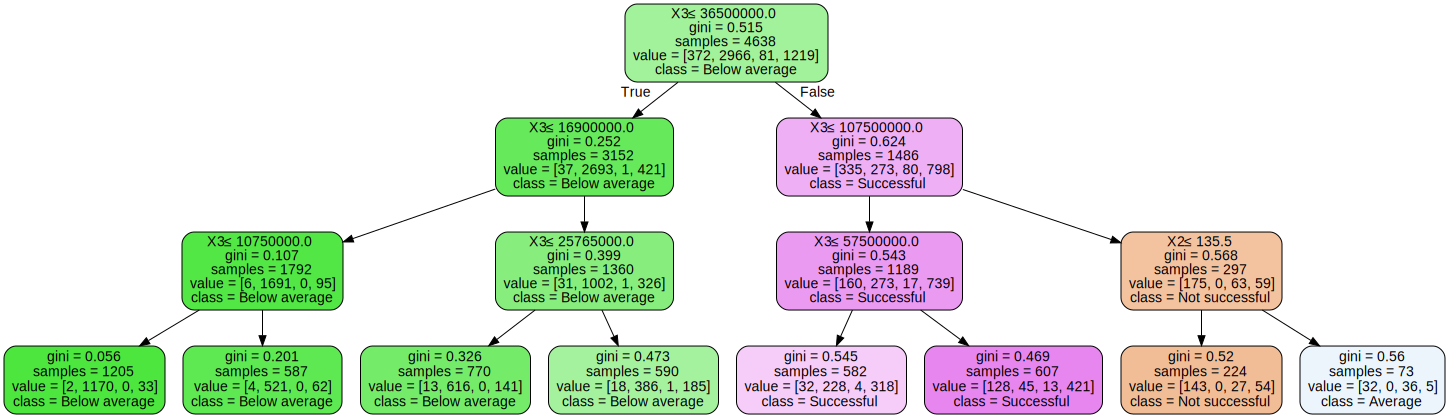

In [109]:
from sklearn import tree
import graphviz
from graphviz import Source
#grouping movies into categories based on k-means clustering of k=4
#0 = Not successful
#1= Below average
#2 = Average
#4 = Successful
clf.fit(x,y)
Source(tree.export_graphviz(clf, out_file=None, class_names=['Not successful','Below average','Average','Successful'], label='all', filled=True, rounded=True,special_characters=True)) 

# KFold Depth=6

In [110]:
x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
for i in range(1,10,+2):
    clf = DecisionTreeClassifier(max_depth=6)
    scoring = 'accuracy'
    score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
    print(i)
    print(round(np.mean(score)*100, 2)) 

1
77.27
3
77.3
5
77.3
7
77.21
9
77.32


In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 34   8   1  45]
 [  0 666   0  63]
 [ 10   1   2   9]
 [  7 113   0 201]]


0.778448275862069

# Performing PCA with Decision Tree, Criterion='entropy' and max_depth=5

In [114]:
x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
for i in range(1,10,+2):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)
    scoring = 'accuracy'
    score = cross_val_score(clf, principalDf, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
    print(i)
    print(round(np.mean(score)*100, 2))

1
76.86
3
76.86
5
76.86
7
76.86
9
76.86


In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 46   8   1  33]
 [  0 684   0  45]
 [  7   1   6   8]
 [ 16 128   1 176]]


0.7862068965517242

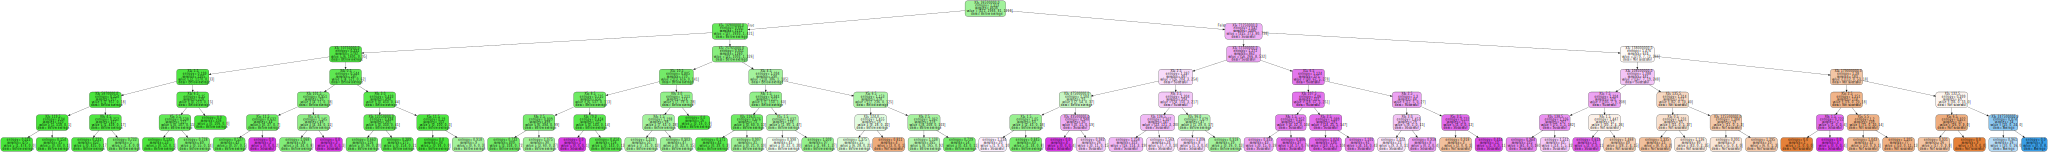

In [116]:
from sklearn import tree
import graphviz
from graphviz import Source
clf.fit(x,y)
Source(tree.export_graphviz(clf, out_file=None, class_names=['Not successful','Below average','Average','Successful'], label='all', filled=True, rounded=True,special_characters=True)) 

In [117]:
x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
for i in range(1,10):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)
    scoring = 'accuracy'
    score = cross_val_score(clf, principalDf, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
    print(i)
    print(round(np.mean(score)*100, 2))

1
74.56
2
74.58
3
74.49
4
74.45
5
74.54
6
74.36
7
74.47
8
74.56
9
74.43


In [118]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 35   9   7  37]
 [  9 662   0  58]
 [  5   4   7   6]
 [ 34 141   1 145]]


0.7318965517241379

# Neural Network for Classifying. Accuracy = 63.95%

In [119]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1500,
                   solver='sgd', activation='relu', verbose=True)
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
print(round(np.mean(score)*100, 2))

Iteration 1, loss = inf
Iteration 2, loss = 53553076383052.99218750
Iteration 3, loss = 58243863579538.75000000
Iteration 4, loss = 58773908858113.62500000
Iteration 5, loss = 58832095874044.45312500
Iteration 6, loss = 58838453963346.35937500
Iteration 7, loss = 58839138605334.34375000
Iteration 8, loss = 58839202435983.22656250
Iteration 9, loss = 58839198337745.03125000
Iteration 10, loss = 58839186806795.03906250
Iteration 11, loss = 58839174462567.55468750
Iteration 12, loss = 58839162029354.39843750
Iteration 13, loss = 58839149586406.85156250
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = inf
Iteration 2, loss = 32709556766341.78906250
Iteration 3, loss = 35574634222586.93750000
Iteration 4, loss = 35898379632129.03125000
Iteration 5, loss = 35933919575836.03906250
Iteration 6, loss = 35937803021870.81250000
Iteration 7, loss = 35938221193136.56250000
Iteration 8, loss = 35938260180151.39062500
Iteration 9, loss = 35

# Neural Network for Classifying with PCA. Accuracy = 75.27%

In [120]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1500,
                   solver='sgd', activation='tanh', verbose=True)
scoring = 'accuracy'
score = cross_val_score(clf, principalDf, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
print(round(np.mean(score)*100, 2))

Iteration 1, loss = 1.51853087
Iteration 2, loss = 0.91743570
Iteration 3, loss = 0.85142909
Iteration 4, loss = 0.84133482
Iteration 5, loss = 0.83570851
Iteration 6, loss = 0.82942201
Iteration 7, loss = 0.82396274
Iteration 8, loss = 0.81914500
Iteration 9, loss = 0.81336361
Iteration 10, loss = 0.80868577
Iteration 11, loss = 0.80384958
Iteration 12, loss = 0.79899246
Iteration 13, loss = 0.79498473
Iteration 14, loss = 0.79089295
Iteration 15, loss = 0.78677438
Iteration 16, loss = 0.78283386
Iteration 17, loss = 0.77912792
Iteration 18, loss = 0.77554904
Iteration 19, loss = 0.77236331
Iteration 20, loss = 0.76907781
Iteration 21, loss = 0.76587781
Iteration 22, loss = 0.76278686
Iteration 23, loss = 0.75981001
Iteration 24, loss = 0.75757481
Iteration 25, loss = 0.75456552
Iteration 26, loss = 0.75192876
Iteration 27, loss = 0.74954373
Iteration 28, loss = 0.74697333
Iteration 29, loss = 0.74458034
Iteration 30, loss = 0.74249027
Iteration 31, loss = 0.74031514
Iteration 32, los

# Neural Network for Classifying with MinMax, PCA. Accuracy = 63.95%

In [121]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df_final[["country","genre","runtime","budget","year","month"]]
y = df_final["Success"]

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1500,
                   solver='sgd', activation='tanh', verbose=True)
scoring = 'accuracy'
score = cross_val_score(clf, principalDf, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
print(round(np.mean(score)*100, 2))

Iteration 1, loss = 1.54650809
Iteration 2, loss = 1.31796753
Iteration 3, loss = 1.15050583
Iteration 4, loss = 1.05439260
Iteration 5, loss = 1.00239306
Iteration 6, loss = 0.97349770
Iteration 7, loss = 0.95633061
Iteration 8, loss = 0.94502981
Iteration 9, loss = 0.93692054
Iteration 10, loss = 0.93103278
Iteration 11, loss = 0.92616625
Iteration 12, loss = 0.92235642
Iteration 13, loss = 0.91912381
Iteration 14, loss = 0.91635929
Iteration 15, loss = 0.91399249
Iteration 16, loss = 0.91192983
Iteration 17, loss = 0.91010385
Iteration 18, loss = 0.90848423
Iteration 19, loss = 0.90693134
Iteration 20, loss = 0.90560655
Iteration 21, loss = 0.90434479
Iteration 22, loss = 0.90323406
Iteration 23, loss = 0.90213160
Iteration 24, loss = 0.90114281
Iteration 25, loss = 0.90018896
Iteration 26, loss = 0.89930504
Iteration 27, loss = 0.89849326
Iteration 28, loss = 0.89773946
Iteration 29, loss = 0.89698111
Iteration 30, loss = 0.89627862
Iteration 31, loss = 0.89561953
Iteration 32, los

# Feature Selection(using budget,month,genre) accuracy=78.4%, k=25

We chose the PCA before KNN as it yields the highest accuracy (77.9% with k=45). I will drop some features to test

In [122]:
x = df_final[["budget","month","genre"]]
y = df_final["Success"]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
for i in range(1,55,+2):
    clf = KNeighborsClassifier(n_neighbors = i)
    scoring = 'accuracy'
    score = cross_val_score(clf, principalDf, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
    print(i)
    print(round(np.mean(score)*100, 2))

1
69.1
3
73.14
5
74.97
7
76.54
9
77.32
11
77.23
13
77.36
15
77.49
17
77.36
19
77.71
21
77.71
23
78.03
25
78.33
27
78.07
29
77.96
31
77.96
33
77.88
35
77.88
37
77.96
39
77.9
41
77.86
43
77.77
45
77.9
47
77.79
49
77.94
51
77.75
53
77.66
